<div style="padding:20px;color:#A7727D;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#FBF8F1;overflow:hidden;font-weight:500"> Naive Bayes Classifier  </div>





# **Table of Contents**

1.	[Introduction](#1)
2.	[Data Preprocessing](#2)
3.	[Model Training](#3)
4.	[Evaluation](#4)
5.	[Cross Validation](#5)


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h2 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Introduction
    </h2>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Importing Libraries
    </h3>
</div>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/adult-dataset/adult.csv


In [2]:
df=pd.read_csv('/kaggle/input/adult-dataset/adult.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
#Number of rows and columns
df.shape

(32560, 15)

In [4]:
## Renaming column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


<div id='2'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h2 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Data Preprocessing
    </h2>
</div>

In [6]:
# categorical columns
categorical =[var for var in df.columns if df[var].dtype=='O']
print(categorical,len(categorical))

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income'] 9


In [7]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


#### Income is the target variable

In [8]:
#Missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [9]:
## Frequency Counts
for var in categorical:
    print(df[var].value_counts)

<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: workclass, Length: 32560, dtype: object>
<bound method IndexOpsMixin.value_counts of 0          Bachelors
1            HS-grad
2               11th
3          Bachelors
4            Masters
            ...     
32555     Assoc-acdm
32556        HS-grad
32557        HS-grad
32558        HS-grad
32559        HS-grad
Name: education, Length: 32560, dtype: object>
<bound method IndexOpsMixin.value_counts of 0         Married-civ-spouse
1                   Divorced
2         Married-civ-spouse
3         Married-civ-spouse
4         Married-civ-spouse
                ...         
32555     Married-civ-spouse
32556     Married-civ-spouse
32557         

In [10]:
# viewing frequency distribution of categorical variables
for var in categorical:
    print(df[var].value_counts()/np.float(len(df)))

 Private             0.697052
 Self-emp-not-inc    0.078041
 Local-gov           0.064281
 ?                   0.056388
 State-gov           0.039834
 Self-emp-inc        0.034275
 Federal-gov         0.029484
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64
 HS-grad         0.322512
 Some-college    0.223925
 Bachelors       0.164435
 Masters         0.052918
 Assoc-voc       0.042445
 11th            0.036087
 Assoc-acdm      0.032770
 10th            0.028655
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013299
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566
Name: education, dtype: float64
 Married-civ-spouse       0.459951
 Never-married            0.328071
 Divorced                 0.136456
 Separated                0.031480
 Widowed                  0.030498
 Married-spouse-absent    0.012838
 Married-AF-spouse        0.000706
Name:

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Finding MisLabelled Values
    </h3>
</div>

 Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

But, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.


In [11]:
# Checking labels in workclass variable
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
# check frequency distribution of values in workclass variable
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [13]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace(' ?', np.nan,inplace=True)

In [14]:
# again check the frequency distribution of values in occupation variable
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [15]:
# check labels in occupation variable
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [16]:
# check frequency distribution of values in occupation variable
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [17]:
# replace '?' values in occupation variable with `NaN`
df['occupation'].replace(' ?', np.nan, inplace=True)

In [18]:
# again check the frequency distribution of values in occupation variable
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [19]:
# check labels in native_country variable
df.native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [20]:
# check frequency distribution of values in native_country variable
df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [21]:
# replace '?' values in native_country variable with `NaN`
df['native_country'].replace(' ?', np.nan, inplace=True)

In [22]:
# again check the frequency distribution of values in native_country variable
df.native_country.value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [23]:
#Checking for missing values 
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [24]:
# check for cardinality in categorical variables
for var in categorical:    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


In [25]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [26]:
# view the numerical variables
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Separating Target Variable
    </h3>
</div>

In [27]:
#Declaring Dependent and Independent variables
X = df.drop(['income'],axis=1)
y = df['income']

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Splitting Training and Testing Dataset
    </h3>
</div>

In [28]:
#Splitting x and y into training and testing datasets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=4)

In [29]:
#checking the shape of X_train and X_test
X_train.shape, X_test.shape

((26048, 14), (6512, 14))

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Filling Missing Values
    </h3>
</div>

In [30]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [31]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [32]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass         0.056319
education         0.000000
marital_status    0.000000
occupation        0.056588
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.017621
dtype: float64

In [33]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.056319103194103194
occupation 0.056587837837837836
native_country 0.017621314496314495


In [34]:
#impute missing categorical variables with most frequent value
for df_c in [X_train,X_test]:
    df_c['workclass'].fillna(X_train['workclass'].mode()[0],inplace=True)
    df_c['occupation'].fillna(X_train['occupation'].mode()[0],inplace=True)
    df_c['native_country'].fillna(X_train['native_country'].mode()[0],inplace=True)

In [35]:
# check missing values in X_train
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [36]:
# check missing values in X_test
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Encoding Categorical Variables
    </h3>
</div>

In [37]:
import category_encoders 
encoder= category_encoders.OneHotEncoder(cols=categorical)
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [38]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22579,55,1,0,0,0,0,0,0,0,162205,...,0,0,0,0,0,0,0,0,0,0
31673,51,1,0,0,0,0,0,0,0,289436,...,0,0,0,0,0,0,0,0,0,0
26376,24,0,1,0,0,0,0,0,0,212210,...,0,0,0,0,0,0,0,0,0,0
5535,54,0,1,0,0,0,0,0,0,186884,...,0,0,0,0,0,0,0,0,0,0
8693,80,1,0,0,0,0,0,0,0,29020,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_test.shape

(6512, 105)

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Feature Scaling
    </h3>
</div>

In [40]:
from sklearn.preprocessing import RobustScaler
cols=X_train.columns
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.133181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.936664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.65,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287295,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.85,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074337,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.253091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div id='3'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h2 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Model Training
    </h2>
</div>

In [42]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

<div id='4'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h2 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Evaluation
    </h2>
</div>

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Accuracy
    </h3>
</div>

In [43]:
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
from sklearn.metrics import accuracy_score
print("Model Accuracy : {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Model Accuracy : {0:0.4f}".format(accuracy_score(y_train,y_pred_train)))

Model Accuracy : 0.7990
Model Accuracy : 0.8002


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Confusion Matrix
    </h3>
</div>

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix\n\n',cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion Matrix

 [[3951 1018]
 [ 291 1252]]

True Positives(TP) =  3951

True Negatives(TN) =  1252

False Positives(FP) =  1018

False Negatives(FN) =  291


<AxesSubplot:>

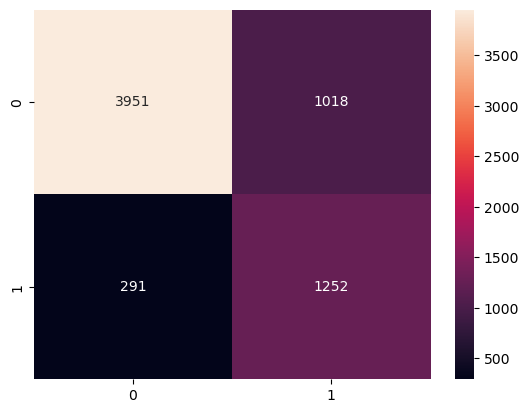

In [45]:
sns.heatmap(cm,annot= True, fmt='d', cmap='rocket')

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Classification Report
    </h3>
</div>

In [46]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4969
        >50K       0.55      0.81      0.66      1543

    accuracy                           0.80      6512
   macro avg       0.74      0.80      0.76      6512
weighted avg       0.84      0.80      0.81      6512



<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;"> Scores from Confusion Matrix
    </h3>
</div>

In [47]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#print recall score
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#true positive rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))


#false positive rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.7990
Classification error : 0.2010
Precision : 0.7951
Recall or Sensitivity : 0.9314
True Positive Rate : 0.9314
False Positive Rate : 0.4485
Specificity : 0.5515


<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC Curve
    </h3>
</div>

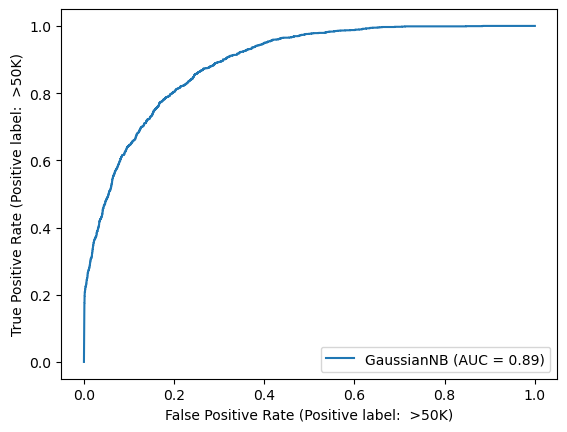

In [48]:
from sklearn import metrics
metrics.plot_roc_curve(model,X_test,y_test)
plt.show()

<div id='1'
     style = "display: fill;
              border-radius: 10px;
              background-color: #AD8B73;">
    <h3 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">ROC AUC Score
    </h3>
</div>

In [49]:
# compute ROC AUC
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8912


<div id='5'
     style = "display: fill;
              border-radius: 10px;
              background-color: #B7CADB;">
    <h2 style = "padding: 15px; 
                 color: white;
                 text-align: left;
                 font-family: Trebuchet MS;">Cross Validation
    </h2>
</div>

In [50]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80460653 0.79692898 0.80191939 0.80307102 0.78119002 0.79769674
 0.79884837 0.80998081 0.80337942 0.79800307]


In [51]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7996
